# Actividad Integradora - Equipo 5

### Integrantes:
- Álvaro Alejandro Rodríguez González - A00822297
- Francisco Ismael Sainz Williams - A00827407
- Marcelo Alejandro Salazar Martínez  - A00818506
- Marcelo Suárez Ponce - A01197108
- Arturo Vázquez Muñoz - A00570187

## Creación del Web Scraper

In [1]:
# Importamos la librerías necesarias
import requests
import numpy as np
import regex as re
from bs4 import BeautifulSoup
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
# Colocamos nuestri URL principal y colocamos parametros de búsqueda
URL = 'https://www.worldometers.info/coronavirus/'
page = requests.get(URL)
soup = BeautifulSoup(page.content,'html.parser')
#Búsqueda de la etiqueta de script que contiene la cadena de casos totales
script = soup.find('script', text=re.compile(r'Total Cases'))
content = script.contents[0]
content

'\n    Highcharts.chart(\'coronavirus-cases-linear\', {\n        chart: {\n            type: \'line\'\n        },\n        title: {\n            text: \'Total Cases\'\n        },\n\n        subtitle: {\n            text: \'(Linear Scale)\'\n        },\n\n        xAxis: {\n            categories: ["Jan 22, 2020","Jan 23, 2020","Jan 24, 2020","Jan 25, 2020","Jan 26, 2020","Jan 27, 2020","Jan 28, 2020","Jan 29, 2020","Jan 30, 2020","Jan 31, 2020","Feb 01, 2020","Feb 02, 2020","Feb 03, 2020","Feb 04, 2020","Feb 05, 2020","Feb 06, 2020","Feb 07, 2020","Feb 08, 2020","Feb 09, 2020","Feb 10, 2020","Feb 11, 2020","Feb 12, 2020","Feb 13, 2020","Feb 14, 2020","Feb 15, 2020","Feb 16, 2020","Feb 17, 2020","Feb 18, 2020","Feb 19, 2020","Feb 20, 2020","Feb 21, 2020","Feb 22, 2020","Feb 23, 2020","Feb 24, 2020","Feb 25, 2020","Feb 26, 2020","Feb 27, 2020","Feb 28, 2020","Feb 29, 2020","Mar 01, 2020","Mar 02, 2020","Mar 03, 2020","Mar 04, 2020","Mar 05, 2020","Mar 06, 2020","Mar 07, 2020","Mar 08, 202

In [3]:
#Dividimos el contenido por medio de nuevas líneas
lines = script.contents[0].split('\n')
lines

['',
 "    Highcharts.chart('coronavirus-cases-linear', {",
 '        chart: {',
 "            type: 'line'",
 '        },',
 '        title: {',
 "            text: 'Total Cases'",
 '        },',
 '',
 '        subtitle: {',
 "            text: '(Linear Scale)'",
 '        },',
 '',
 '        xAxis: {',
 '            categories: ["Jan 22, 2020","Jan 23, 2020","Jan 24, 2020","Jan 25, 2020","Jan 26, 2020","Jan 27, 2020","Jan 28, 2020","Jan 29, 2020","Jan 30, 2020","Jan 31, 2020","Feb 01, 2020","Feb 02, 2020","Feb 03, 2020","Feb 04, 2020","Feb 05, 2020","Feb 06, 2020","Feb 07, 2020","Feb 08, 2020","Feb 09, 2020","Feb 10, 2020","Feb 11, 2020","Feb 12, 2020","Feb 13, 2020","Feb 14, 2020","Feb 15, 2020","Feb 16, 2020","Feb 17, 2020","Feb 18, 2020","Feb 19, 2020","Feb 20, 2020","Feb 21, 2020","Feb 22, 2020","Feb 23, 2020","Feb 24, 2020","Feb 25, 2020","Feb 26, 2020","Feb 27, 2020","Feb 28, 2020","Feb 29, 2020","Mar 01, 2020","Mar 02, 2020","Mar 03, 2020","Mar 04, 2020","Mar 05, 2020","Mar 06

In [4]:
# Econtramos la línea que contiene el atributo categories seguido de un array
categories = list(filter(lambda l: re.match("categories: \[.*\]",l.strip()), lines))[0]
categories = categories.strip()
categories

'categories: ["Jan 22, 2020","Jan 23, 2020","Jan 24, 2020","Jan 25, 2020","Jan 26, 2020","Jan 27, 2020","Jan 28, 2020","Jan 29, 2020","Jan 30, 2020","Jan 31, 2020","Feb 01, 2020","Feb 02, 2020","Feb 03, 2020","Feb 04, 2020","Feb 05, 2020","Feb 06, 2020","Feb 07, 2020","Feb 08, 2020","Feb 09, 2020","Feb 10, 2020","Feb 11, 2020","Feb 12, 2020","Feb 13, 2020","Feb 14, 2020","Feb 15, 2020","Feb 16, 2020","Feb 17, 2020","Feb 18, 2020","Feb 19, 2020","Feb 20, 2020","Feb 21, 2020","Feb 22, 2020","Feb 23, 2020","Feb 24, 2020","Feb 25, 2020","Feb 26, 2020","Feb 27, 2020","Feb 28, 2020","Feb 29, 2020","Mar 01, 2020","Mar 02, 2020","Mar 03, 2020","Mar 04, 2020","Mar 05, 2020","Mar 06, 2020","Mar 07, 2020","Mar 08, 2020","Mar 09, 2020","Mar 10, 2020","Mar 11, 2020","Mar 12, 2020","Mar 13, 2020","Mar 14, 2020","Mar 15, 2020","Mar 16, 2020","Mar 17, 2020","Mar 18, 2020","Mar 19, 2020","Mar 20, 2020","Mar 21, 2020","Mar 22, 2020","Mar 23, 2020","Mar 24, 2020","Mar 25, 2020","Mar 26, 2020","Mar 27, 20

In [5]:
#Limpiamos los datos
categories = categories[14:-1]
categories = re.split(r'\","', categories)
categories[-1] = categories[-1][0:-11]
Dates = categories
Dates

['Jan 22, 2020',
 'Jan 23, 2020',
 'Jan 24, 2020',
 'Jan 25, 2020',
 'Jan 26, 2020',
 'Jan 27, 2020',
 'Jan 28, 2020',
 'Jan 29, 2020',
 'Jan 30, 2020',
 'Jan 31, 2020',
 'Feb 01, 2020',
 'Feb 02, 2020',
 'Feb 03, 2020',
 'Feb 04, 2020',
 'Feb 05, 2020',
 'Feb 06, 2020',
 'Feb 07, 2020',
 'Feb 08, 2020',
 'Feb 09, 2020',
 'Feb 10, 2020',
 'Feb 11, 2020',
 'Feb 12, 2020',
 'Feb 13, 2020',
 'Feb 14, 2020',
 'Feb 15, 2020',
 'Feb 16, 2020',
 'Feb 17, 2020',
 'Feb 18, 2020',
 'Feb 19, 2020',
 'Feb 20, 2020',
 'Feb 21, 2020',
 'Feb 22, 2020',
 'Feb 23, 2020',
 'Feb 24, 2020',
 'Feb 25, 2020',
 'Feb 26, 2020',
 'Feb 27, 2020',
 'Feb 28, 2020',
 'Feb 29, 2020',
 'Mar 01, 2020',
 'Mar 02, 2020',
 'Mar 03, 2020',
 'Mar 04, 2020',
 'Mar 05, 2020',
 'Mar 06, 2020',
 'Mar 07, 2020',
 'Mar 08, 2020',
 'Mar 09, 2020',
 'Mar 10, 2020',
 'Mar 11, 2020',
 'Mar 12, 2020',
 'Mar 13, 2020',
 'Mar 14, 2020',
 'Mar 15, 2020',
 'Mar 16, 2020',
 'Mar 17, 2020',
 'Mar 18, 2020',
 'Mar 19, 2020',
 'Mar 20, 2020

In [6]:
# Para el número de casos, hacemos lo mismo
cases = list(filter(lambda l: re.match("data: \[.*\]",l.strip()), lines))[2]
cases = cases.split()[1]
cases = cases[1:-1]
cases = cases.split(',')
cases[0] = '0'
cases

['0',
 '271',
 '475',
 '701',
 '787',
 '1784',
 '1479',
 '1763',
 '2016',
 '2138',
 '2626',
 '2857',
 '3253',
 '3927',
 '3728',
 '3184',
 '3453',
 '2685',
 '3004',
 '2569',
 '2050',
 '14180',
 '5175',
 '2681',
 '2132',
 '2158',
 '2031',
 '1880',
 '534',
 '1034',
 '1058',
 '1038',
 '629',
 '992',
 '861',
 '1135',
 '1456',
 '1818',
 '2202',
 '2630',
 '2610',
 '3300',
 '3176',
 '4289',
 '5102',
 '5747',
 '5890',
 '7206',
 '8730',
 '11267',
 '13258',
 '16507',
 '17125',
 '19170',
 '20462',
 '22809',
 '26868',
 '31737',
 '38509',
 '33391',
 '36497',
 '44394',
 '44850',
 '48980',
 '61642',
 '66469',
 '67387',
 '61116',
 '64910',
 '75756',
 '78685',
 '81339',
 '86654',
 '83773',
 '74371',
 '77952',
 '84226',
 '89420',
 '90811',
 '98402',
 '86159',
 '77058',
 '77036',
 '80340',
 '87102',
 '87689',
 '89710',
 '84862',
 '78606',
 '83107',
 '81605',
 '84586',
 '86592',
 '98256',
 '91465',
 '75036',
 '71823',
 '78241',
 '81569',
 '89495',
 '95860',
 '83833',
 '83437',
 '82629',
 '83726',
 '97395',

In [7]:
# Los convertimos a tipo entero
cases = list(map(lambda x: int(x), cases))   
cases

[0,
 271,
 475,
 701,
 787,
 1784,
 1479,
 1763,
 2016,
 2138,
 2626,
 2857,
 3253,
 3927,
 3728,
 3184,
 3453,
 2685,
 3004,
 2569,
 2050,
 14180,
 5175,
 2681,
 2132,
 2158,
 2031,
 1880,
 534,
 1034,
 1058,
 1038,
 629,
 992,
 861,
 1135,
 1456,
 1818,
 2202,
 2630,
 2610,
 3300,
 3176,
 4289,
 5102,
 5747,
 5890,
 7206,
 8730,
 11267,
 13258,
 16507,
 17125,
 19170,
 20462,
 22809,
 26868,
 31737,
 38509,
 33391,
 36497,
 44394,
 44850,
 48980,
 61642,
 66469,
 67387,
 61116,
 64910,
 75756,
 78685,
 81339,
 86654,
 83773,
 74371,
 77952,
 84226,
 89420,
 90811,
 98402,
 86159,
 77058,
 77036,
 80340,
 87102,
 87689,
 89710,
 84862,
 78606,
 83107,
 81605,
 84586,
 86592,
 98256,
 91465,
 75036,
 71823,
 78241,
 81569,
 89495,
 95860,
 83833,
 83437,
 82629,
 83726,
 97395,
 96895,
 97396,
 89431,
 80923,
 74442,
 88556,
 92273,
 99066,
 102576,
 97413,
 83656,
 93070,
 98301,
 105096,
 110086,
 110025,
 102261,
 98814,
 93582,
 96153,
 109278,
 120060,
 128967,
 127056,
 111352,
 

## Regresion lineal

In [8]:
#Creación de ndarrays con los datos
d = np.arange(len(cases))
c = np.array(cases)

In [9]:
#Se checan que ambos tengan un shape adecuado. 
d = d.reshape(-1,1)
print(d.shape)
print(c.shape)

(410, 1)
(410,)


In [10]:
#Se incia el modelo de regresion lineal
linR = LinearRegression()

In [11]:
#Se inicializa el modelo de entrenamiento
d_train, d_test, c_train, c_test = train_test_split(d,c,test_size = 0.33,random_state = 42)

In [12]:
#Se ajusta el modelo con los datos de entrenamiento
linR.fit(d_train,c_train)

LinearRegression()

In [13]:
#Obtenemos los coeficientes de nuestra regresion lineal
m = float(linR.coef_)
b = float(linR.intercept_)
print('y =',m,'*x',b)

y = 1782.539737631993 *x -72017.35624451836


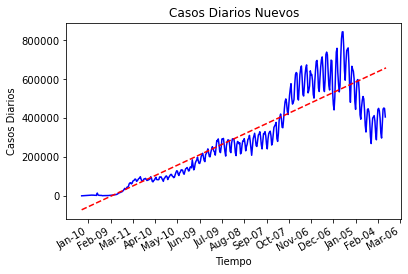

In [14]:
x = np.linspace(0,len(cases),100)
y = m*x+b
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.plot(Dates, cases, color = 'b')
plt.plot(x, y, color = 'r',linestyle = 'dashed')
plt.ylabel('Casos Diarios')
plt.xlabel('Tiempo')
plt.title('Casos Diarios Nuevos')
#plt.savefig("Plot.png")
plt.gcf().autofmt_xdate()
plt.show()